## Observations and Insights

## Dependencies and starter code

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [95]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', suffixes=['_l', '_r'])
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime

mean_df = combined_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)" ]].groupby(["Drug Regimen"]).mean()
mean_df = mean_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Size"})
mean_df

median_df = combined_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)" ]].groupby(["Drug Regimen"]).median()
median_df = median_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Size"})
median_df

variance_df = combined_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)" ]].groupby(["Drug Regimen"]).var()
variance_df = variance_df.rename(columns={"Tumor Volume (mm3)":"Variance Tumor Size"})
variance_df


standard_deviation_df = combined_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)" ]].groupby(["Drug Regimen"]).std()
standard_deviation_df = standard_deviation_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation Tumor Size"})
standard_deviation_df

sem_df = combined_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)" ]].groupby(["Drug Regimen"]).sem()
sem_df = sem_df.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Size"})
sem_df

summary_df = pd.DataFrame(mean_df)
summary_df["Median Tumor Size"] = median_df["Median Tumor Size"]
summary_df = pd.merge(summary_df, variance_df, on="Drug Regimen")
summary_df

summary_df = pd.merge(summary_df, standard_deviation_df, on="Drug Regimen")
summary_df

summary_df = pd.merge(summary_df, sem_df, on="Drug Regimen")
summary_df
#combined_df

,Average Tumor Size,Median Tumor Size,Variance Tumor Size,Standard Deviation Tumor Size,SEM Tumor Size
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

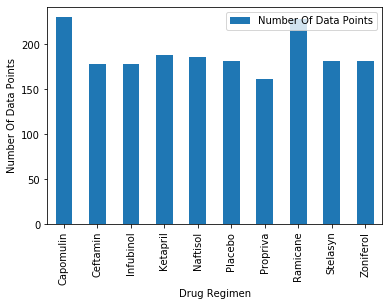

In [98]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

count_df = combined_df.loc[:, ["Drug Regimen", "Timepoint" ]].groupby(["Drug Regimen"]).count()

count_df = count_df.rename(columns={"Timepoint":"Number Of Data Points"})
count_df
# count_df = combined_df["Drug Regimen"].value_counts()
# count_df

count_df.plot(kind='bar')
plt.ylabel("Number Of Data Points")
plt.show()

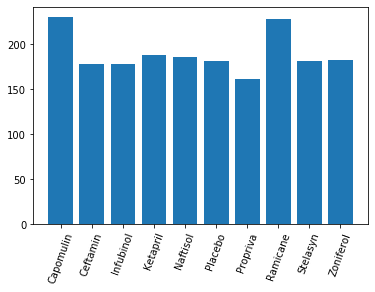

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count = count_df.values
count = [x[0] for x in count]
regimen = count_df.index.values
plt.bar(regimen, count)
plt.xticks(rotation=70)
plt.show()

## Pie plots

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


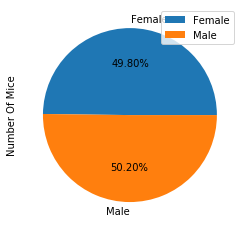

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


count_df = combined_df.loc[:, ["Drug Regimen", "Timepoint" ]].groupby(["Drug Regimen"]).count()
count_df = count_df.rename(columns={"Timepoint":"Number Of Data Points"})
count_df
print(mouse_metadata.columns)
sex_distribution_df = mouse_metadata.loc[:, ["Mouse ID", "Sex" ]].groupby(["Sex"]).count()
sex_distribution_df = sex_distribution_df.rename(columns={"Mouse ID": "Number Of Mice"})
sex_distribution_df
sex_distribution_df.plot(kind='pie', y='Number Of Mice', autopct="%0.2f%%")





['Female' 'Male']
[124 125]


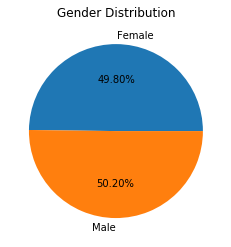

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_distribution_df.index.values # Because Sex is the index, we have to use the index property
print(labels)
xdata = sex_distribution_df['Number Of Mice'].values
print(xdata)
sex_distribution_df
fig, ax = plt.subplots()
ax.pie(xdata,labels=labels,  autopct="%0.2f%%")
ax.set_title("Gender Distribution")
plt.show()

In [83]:
## Quartiles, outliers and boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen